The goal of learning is reached


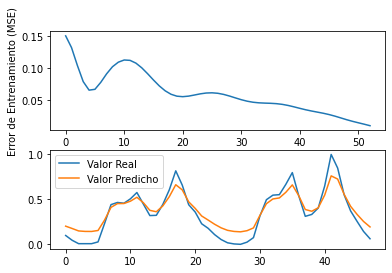

In [ ]:
import neurolab as nl
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.preprocessing import MinMaxScaler
#*************************************************************************************
serie = pd.read_csv('demanda.csv', nrows= 48)
demanda=np.asarray([float(x.replace(',','.')) for x in serie['Valor']]).reshape(-1,1)
scaler = MinMaxScaler()
demanda=scaler.fit_transform(demanda)
target = demanda 
#*************************************************************************************
# Creamos una red de Elman con dos capas
net = nl.net.newelm([[0, 1]], [20, 1], [nl.trans.TanSig(), nl.trans.PureLin()])
# Inicializamos los pesos de manera aleatoria
net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
net.layers[1].initf= nl.init.InitRand([-0.1, 0.1], 'wb')
net.init()
# Entrenamos la red
error = net.train(demanda, target, epochs=500, show=100, goal=0.01)
# Hacemos las predicciones
output = net.sim(demanda)
#************************************************************************************
pl.subplot(211)
pl.plot(error)
pl.xlabel('Número de Epocas')
pl.ylabel('Error de Entrenamiento (MSE)')
pl.subplot(212)
pl.plot(target)
pl.plot(output)
pl.legend(['Valor Real', 'Valor Predicho'])
pl.show()